#Overview - Home Owners' Loan Corporation area descriptions and the legacy of 'redlining'

###nicholas@uoregon.edu

by Nicholas Kohler
updated May 15, 2025

***

**_'Redlining'_** is described as
> *the systematic denial of various services or goods by federal government agencies, local governments, or the private sector either directly or through the selective raising of prices. This is often manifested by placing strict criteria on specific services and goods that often disadvantage poor and minority communities* [https://en.wikipedia.org/wiki/Redlining]

From 1935 to 1940, the Federal Governments 'Home Owners' Loan Corporation' (HOLC) created 'area descriptions' that are the widely associated with the term 'redlining' -

> *HOLC staff members, using data and evaluations organized by local real estate professionals--lenders, developers, and real estate appraisers--in each city, assigned grades to residential neighborhoods that reflected their "mortgage security" that would then be visualized on color-coded maps. Neighborhoods receiving the highest grade of "A"--colored green on the maps--were deemed minimal risks for banks and other mortgage lenders when they were determining who should received loans and which areas in the city were safe investments. Those receiving the lowest grade of "D," colored red, were considered "hazardous."...*

> *HOLC created area descriptions to help to organize the data they used to assign the grades. Among that information was the neighborhood's quality of housing, the recent history of sale and rent values, and, crucially, the racial and ethnic identity and class of residents that served as the basis of the neighborhood's grade. These maps and their accompanying documentation helped set the rules for nearly a century of real estate practice.*

The **Mapping Inequality** project created a digital archive of the HOLC areas and descriptions [https://dsl.richmond.edu/panorama/redlining/#loc=5/39.1/-94.58], which has allowed the broad impact of these to be investigated across the United States. The project is described in an NPR broadcast from 2016 and a 2020 report:
* Domonoske, Camila. 2016. “Interactive Redlining Map Zooms In On America’s History Of Discrimination.” NPR, October 19, 2016. https://www.npr.org/sections/thetwo-way/2016/10/19/498536077/interactive-redlining-map-zooms-in-on-americas-history-of-discrimination.
  
* Nelson, Robert K. 2020. “Mapping Inequality: There Were No Dog Whistles, the Racism Was Loud and Clear. » NCRC.” September 10, 2020. https://www.ncrc.org/mapping-inequality-there-were-no-dog-whistles-the-racism-was-loud-and-clear/.

It should be noted that the HOLC descriptions are themselves a type of suitability analysis that in the present would be conducted with a geographic information system - and that the dangers of racial bias would be present once again!






# Exercise description

Research has linked these HOLC area descriptions with the subsequent development of urban, ethnic, and economic characteristics in the different grades of the HOLC system.

The HOLC designations '*helped set the rules for nearly a century of real estate practice*' - can these differences in real estate practice be detected with remote sensing and other geospatial data?

This exercise examines the HOLC areas by:
1. Comparing modeled bioclimatic variables (such as seasonal temperatures) and satellite measured indices (such as vegetation greenness) in the different grades of HOLC zones in a single city (Denver, Colorado).
2. Re-running the analysis in another urban region with historical HOLC zone designations.
3. Adding additional datasets to the analysis.
4. Comparing the results between regions, and between different environmental measures
5. Discussing the relative merits of the different measures for this type of analysis.



## Datasets
Datasets used in this notebook include:

*  [World Bioclimate Variables](https://developers.google.com/earth-engine/datasets/catalog/WORLDCLIM_V1_BIO?hl=enList)
*  [Landsat 8 EVI Composites](https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C01_T1_32DAY_EVI?hl=enList)
* Other datasets from the [Earth Engine Data Catalog](https://developers.google.com/earth-engine/datasets?hl=enList)
* HOLC area descriptions from the **Mapping Inequality** project (see below)

The **Mapping Inequality** spatial data is described here:

Robert K. Nelson, LaDale Winling, Richard Marciano, Nathan Connolly, et al.,

*   “Mapping Inequality,” American Panorama, ed. Robert K. Nelson and Edward L. Ayers. Accessed February 16, 2021. https://dsl.richmond.edu/panorama/redlining/#loc=5/39.1/-94.58.
 *  The HOLC polygons data was downloaded from here: https://dsl.richmond.edu/panorama/redlining/static/fullshpfile.zipList item
 * Other data from the Mapping Inequality project is available here: https://dsl.richmond.edu/panorama/redlining/#loc=5/39.1/-94.58&text=downloads

 Note that the HOLC analysis is itself a type of suitability analysis that would in the present day be conducted using a GIS - and the dangers of racial bias in such a study would still be present!



## Earth Engine and the Python API

Google [Earth Engine](https://earthengine.google.com/faq/#:~:text=Earth%20Engine%20is%20a%20platform,back%20more%20than%20forty%20years.) is a cloud data storage and computing environment to work with geospatial data, primarily via javascript or python computing script (see [this guide](https://developers.google.com/earth-engine/guides) for more information. The geemap (https://geemap.org/) and geopandas ( ) modules are also use to work with and display geospatial data.





# HOLC Zone preparatory examinations

To get some idea of the HOLC descriptions, examine the HOLC zones in Denver, Colorado using the [Mapping Inequality](https://dsl.richmond.edu/panorama/redlining/#loc=12/39.71/-105.065&city=denver-co) interactive map.

- Take a look at the size and shape of the HOLC zones in Denver, Colorado and think about the spatial resolution needed for remote sensing imagery to usefully show differences between the zones.
- The exercise starts by generating vegetation and climate statistics for HOLC zones in Denver, after which:
 - a different urban region with HOLC area to run the analysis on
 - two additional Earth Engine data layers to include in the analysis

# Computing environment preparations

Install and import modules for analysis, and prepare the connection to the Earth Engine computing environment.

## install modules and import

In [ ]:
# these modules should installed by default on colaboratory
#!pip install geemap
#!pip install geopandas

In [ ]:
# earth engine
import ee
import geemap.foliumap as geemap
#from geemap import geojson_to_ee, ee_to_geojson

# analysis and mapping
import pandas as pd
import numpy as np
import geopandas as gpd
import folium
#import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from pprint import pprint

# file management stuff
import datetime
import glob
import urllib
import zipfile
from zipfile import ZipFile

## Authenticate and Start Earth Engine

This lets the notebook interact with the Earth Engine cloud computing infrastructure using your account.
Hit enter after you paste in your authorization code in the step below.

1.   Run the cell below (the `ee.Authenticate()` one).
2.   A link will appear to autheniticate your Google Earth Engine account access.
3. Allow access by pressing the button, then copy the code provided.
4. Paste the code into the box in the cell, and hit enter afterwards.
5. Run the following cell (the `ee.Initialize()` one) to start your Earth Engine session.

*There is an elaborate series of warnings and buttons to authorize access - be patient and read carefully to get through*

 - *It is possible to save a file in your own Google Drive space to bypass this step after the first time if you 'mount' to this space in the notebook.*

  - *It may be necessry to find the name of your 'project' in the world of google cloud services to properly connect to earth engine*

  -

In [ ]:
ee.Authenticate()


After all the button pressing, hopefully the cell above successfully runs. Then:

- Run the cell below to initialize earth engine and get started


### Find your earth engine project name and replace the project name below

To identify your own basic earth engine project name, go to:

https://code.earthengine.google.com/

Your generic earth engine project name should appear on the top right.

In [ ]:
# start the ee session
# Initialize the library.
ee.Initialize(project='useful-builder-474619-f1') # replace with your own earth engine project name

### Initialization issues?

https://github.com/googlecolab/colabtools/issues/4228

If you have problems on the next step (initializing the access to earth engine) you may need to specifically name the project space to work in - this can be identified by visiting your Google Console at:

https://console.cloud.google.com/apis/dashboard

If there is a specific project name you need to put in, the console should automatically put you in that project space (if you are logged into your google account).


## Define Functions

This sets up a few custom tools for the display and analysis of the data. We won't go into the details of how they work - `add_ee_layer()` helps display earth engine data in the interactive maps, others will sample values in raster datasets based on vector feature polygons and be created to display charts and maps quickly.

### add earth engine layer function

In [ ]:
# Define a method for displaying Earth Engine image tiles on a folium map.
def add_ee_layer(self, ee_object, vis_params, name):

    try:
        # display ee.Image()
        if isinstance(ee_object, ee.image.Image):
            map_id_dict = ee.Image(ee_object).getMapId(vis_params)
            folium.raster_layers.TileLayer(
            tiles = map_id_dict['tile_fetcher'].url_format,
            attr = 'Google Earth Engine',
            name = name,
            overlay = True,
            control = True
            ).add_to(self)
        # display ee.ImageCollection()
        elif isinstance(ee_object, ee.imagecollection.ImageCollection):
            ee_object_new = ee_object.mosaic()
            map_id_dict = ee.Image(ee_object_new).getMapId(vis_params)
            folium.raster_layers.TileLayer(
            tiles = map_id_dict['tile_fetcher'].url_format,
            attr = 'Google Earth Engine',
            name = name,
            overlay = True,
            control = True
            ).add_to(self)
        # display ee.Geometry()
        elif isinstance(ee_object, ee.geometry.Geometry):
            folium.GeoJson(
            data = ee_object.getInfo(),
            name = name,
            overlay = True,
            control = True
        ).add_to(self)
        # display ee.FeatureCollection()
        elif isinstance(ee_object, ee.featurecollection.FeatureCollection):
            ee_object_new = ee.Image().paint(ee_object, 0, 2)
            map_id_dict = ee.Image(ee_object_new).getMapId(vis_params)
            folium.raster_layers.TileLayer(
            tiles = map_id_dict['tile_fetcher'].url_format,
            attr = 'Google Earth Engine',
            name = name,
            overlay = True,
            control = True
        ).add_to(self)

    except:
        print("Could not display {}".format(name))

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

# Add EE drawing method to folium.
#folium.Map.add_ee_layer = add_ee_layer
#folium.DualMap.add_ee_layer = add_ee_layer

### sample HOLC zones function

In [ ]:
# Function to sample values by HOLC zones
def sample_holc_layer(zones, dataset, scale):
  resultList = []
  for feat in zones.getInfo()['features']:
    name = feat['properties']['joinid']
    print(name)
    region = ee.Feature(zones.filter(ee.Filter.eq('joinid', name)).first())
    # Reduce the region. The region parameter is the Feature geometry.
    meanDictionary = dataset.reduceRegion(**{'reducer': ee.Reducer.mean(),'geometry': region.geometry(),'scale': scale,'maxPixels': 1e9})
    # The result is a Dictionary.  Print it.
    #resultDict[name]=meanDictionary.getInfo()
    resultList.append(meanDictionary.getInfo())
    pprint(meanDictionary.getInfo())

  datadf = pd.DataFrame(resultList)
  datadf.reset_index(inplace=True)
  #datadf['joinid']=datadf['index'].apply(str)

  return datadf


### display boxplots function

In [ ]:
def plotZoneBoxP(df, column):
  # create color dictionary for HOLC ratings
  cdict = {"A": "green", "B": "blue", "C": "yellow", "D": "red"}
  # boxplot with sanborne module and matplotlib
  ax = sns.boxplot(x='grade', y=column, data=df, palette=cdict, hue='grade', order=['A', 'B', 'C', 'D'])
  ax.set_title(f'HOLC grade and {column} in {cityname}')
  ax.set_ylabel(var)
  ax.set_xlabel('HOLC grade')
  return ax

### display interactive map function

In [ ]:
def makeHOLCmap(df, analysis_layer, chorodata, fill_color, layervisParams):
  # create the figure with folium
  # get the centroid for the map initial display
  cent = df.centroid
  centlong = cent.x.values[0]
  centlat = cent.y.values[0]

  #set up the inputs for the figure
  title_text = f'HOLC Zones and {chorodata} in {cityname}, {statename}'
  title_html = '''
              <h3 align="center" style="font-size:16px"><b>{}</b></h3>
              '''.format(title_text)

  #create the figure
  m = folium.Figure(width=800, height=600)
  Map = geemap.Map(center=[centlat, centlong], zoom=11).add_to(m)

  # create the choropleth map of the data
  choropleth = folium.Choropleth(
      geo_data=df,
          data=df,
      columns=['area_id', chorodata],
      key_on="feature.properties.area_id",
      fill_color=fill_color,
      fill_opacity=0.7,
      line_opacity=0.2,
      legend_name=chorodata,
      #tooltip = 'feature.properties.holc_zones'
  ).add_to(Map)

  choropleth.geojson.add_child(
      folium.features.GeoJsonTooltip([chorodata, 'grade'],labels=True)
  )

  choropleth.layer_name = f'HOLC {chorodata}'

  #plot the earth engine layer
  Map.add_ee_layer(analysis_layer, layervisParams, f'{chorodata}')

  # add the layer control
  folium.LayerControl().add_to(Map)

  #add the title
  Map.get_root().html.add_child(folium.Element(title_html))

  #export a html of the figure
  outhtml = f'{cityname}_{statename}_HOLCand{chorodata}.html'
  m.save(outhtml)
  print(f'Saved {outhtml}')

  # view the figure in the notebook
  return m
  #return m.save(outhtml)

# Get the datasets

Now that the computing environment is set-up, get the data necessary for the analysis. This consists of:
- downloading, unzipping, and importing the HOLC zone data, and
- loading in the earth engine datasets

## The HOLC dataset

The Mapping inequality dataset can be downloaded and added to earth engine as a 'feature' - one version comes as geojson file at the url below. This can be opened using the 'geopandas' module (`gpd.read_file()`).



In [ ]:
# @title
# link to data
HOLC_url = 'https://dsl.richmond.edu/panorama/redlining/static/mappinginequality.json'

In [ ]:
# read in the geojson file from the web
rl_polys = gpd.read_file(HOLC_url)

# examine the data
rl_polys.tail()

,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill,geometry
10149,6518,Wheeling,WV,True,Hazardous,D,D4,True,False,False,#d9838d,"MULTIPOLYGON (((-80.71985 40.06376, -80.71943 ..."
10150,6520,Wheeling,WV,True,Hazardous,D,D5,True,False,False,#d9838d,"MULTIPOLYGON (((-80.72854 40.06729, -80.7287 4..."
10151,6516,Wheeling,WV,True,Hazardous,D,D6,True,False,False,#d9838d,"MULTIPOLYGON (((-80.72216 40.06134, -80.72247 ..."
10152,6512,Wheeling,WV,True,Hazardous,D,D7,True,False,False,#d9838d,"MULTIPOLYGON (((-80.6474 40.04886, -80.64842 4..."
10153,6513,Wheeling,WV,True,Hazardous,D,D8,True,False,False,#d9838d,"MULTIPOLYGON (((-80.66614 40.0497, -80.66678 4..."


In [ ]:
# check the number of records
len(rl_polys)

10154

## Using Colaboratory, the data is stored in a temporary online drive space

The taskbar on the left has a file view that should contain the data now. You can also link to your own personal online drivespace to access data such as the code below would allow.

`from google.colab import drive`

`drive.mount('/content/drive')`

See this online post/notebook for more information:

https://colab.research.google.com/notebooks/io.ipynb




### Read the HOLC dataset with geopandas and look at the data table

"Geopandas" is a python geospatial analysis module, which we will use to examine the HOLC dataset.

#### Preprocessing

When we look at the attribute table above, there should be 10150 rows of data. Some of these rows are 'multipolygons' - these need to be split up for the sampling.

In [ ]:
# @title
# remove rows with no geometry
rl_polys=rl_polys[~rl_polys.geometry.isnull()]
print(len(rl_polys))

#break up multipolygons to prepare for analysis in earth engine
rl_polys = rl_polys.explode(index_parts=True)

rl_polys.tail(2)

10154


,,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill,geometry
10152,0,6512,Wheeling,WV,True,Hazardous,D,D7,True,False,False,#d9838d,"POLYGON ((-80.6474 40.04886, -80.64842 40.0497..."
10153,0,6513,Wheeling,WV,True,Hazardous,D,D8,True,False,False,#d9838d,"POLYGON ((-80.66614 40.0497, -80.66678 40.0491..."


In [ ]:
print(len(rl_polys))

13789


There should now be 13789 rows of data, with index numbers going up to 10153

In [ ]:
# examine the first three rows of data
rl_polys.head(3)

,,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill,geometry
0,0,244,Birmingham,AL,True,Best,A,A1,True,False,False,#76a865,"POLYGON ((-86.75678 33.49754, -86.75653 33.501..."
1,0,193,Birmingham,AL,True,Best,A,A2,True,False,False,#76a865,"POLYGON ((-86.75867 33.50933, -86.76134 33.512..."
2,0,206,Birmingham,AL,True,Best,A,A3,True,False,False,#76a865,"POLYGON ((-86.75678 33.49754, -86.75692 33.495..."


### Select the urban area redlining data

This exercise uses Denver, Colorado as an example study area - the analysis could be easily done (though it would take some time) for all the HOLC zones in the database at once, but it is more manageable to focus on a single urban area.

####  change the query below to change the area of interest for the analysis!

for example, to get Portland, Oregon (as opposed to Portland, Maine) use

```
statename = "OR"
cityname = "Portland"

```

This example uses the city of *Denver, CO* - here is the city on an [online map](https://maps.app.goo.gl/iuf4G6vdTnQoniXZ9)  

In [ ]:
#select just the HOLC polygons in specific state and city
statename = "OR"
cityname = "Portland"

# query the pandas data frame and make a copy of the selected data
df_slice = rl_polys.loc[(rl_polys.state == statename) & (rl_polys.city == cityname)]
loc_polys = df_slice.copy()

# change the index for joining purposes later
loc_polys.reset_index(drop=True, inplace=True)

<Axes: >

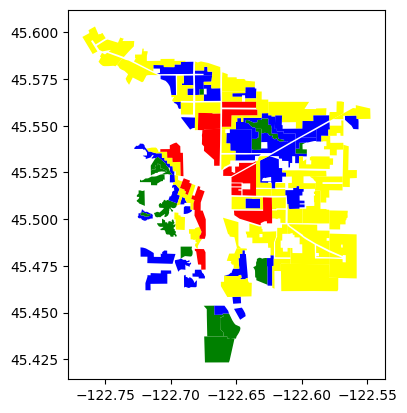

In [ ]:
#plot the output to check
#roughly match the HOLC zone map original coloration
cmap = ListedColormap(["green", "blue", "yellow", "red"])
loc_polys.plot(column='grade', cmap=cmap)

In [ ]:
#look at the data table
loc_polys.tail(3)

,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill,geometry
134,11154,Portland,OR,True,Industrial,None,Industrial,False,False,True,#000000,"POLYGON ((-122.69657 45.54629, -122.69894 45.5..."
135,11154,Portland,OR,True,Industrial,None,Industrial,False,False,True,#000000,"POLYGON ((-122.67625 45.54013, -122.67731 45.5..."
136,11154,Portland,OR,True,Industrial,None,Industrial,False,False,True,#000000,"POLYGON ((-122.69186 45.58788, -122.70159 45.5..."


## Bring zone dataset into ee

The HOLC zone data is available for you to look at, but not yet accessible to the earth engine api analysis and datasets.  

We will add a unique id field for use in sampling the raster datasets, then create an earth engine 'feature layer' from the zones.


### Add unique id

In [ ]:
# list files in the directory
import os
os.listdir()

['.config', 'sample_data']

In [ ]:
# change the index for joining purposes later
loc_polys.reset_index(drop=True, inplace=True)
# create a join field for later
# make a table index
loc_polys.reset_index(inplace=True)
# copy the index to an attribure field and change the type
loc_polys['joinid']=loc_polys.index
loc_polys['joinid']=loc_polys['joinid'].apply(str)

In [ ]:
loc_polys.tail()

,index,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill,geometry,joinid
132,132,11154,Portland,OR,True,Industrial,None,Industrial,False,False,True,#000000,"POLYGON ((-122.67912 45.53295, -122.6825 45.53...",132
133,133,11154,Portland,OR,True,Industrial,None,Industrial,False,False,True,#000000,"POLYGON ((-122.57855 45.53419, -122.57852 45.5...",133
134,134,11154,Portland,OR,True,Industrial,None,Industrial,False,False,True,#000000,"POLYGON ((-122.69657 45.54629, -122.69894 45.5...",134
135,135,11154,Portland,OR,True,Industrial,None,Industrial,False,False,True,#000000,"POLYGON ((-122.67625 45.54013, -122.67731 45.5...",135
136,136,11154,Portland,OR,True,Industrial,None,Industrial,False,False,True,#000000,"POLYGON ((-122.69186 45.58788, -122.70159 45.5...",136


In [ ]:
# use geemap to convert geopandas to earth engine feature collection
ee_rls=geemap.geopandas_to_ee(loc_polys, geodesic=True, date=None, date_format='YYYY-MM-dd')

In [ ]:
# create a query that makes a layer earth engine likes
ee_studyholc = ee_rls.filter(ee.Filter.And(
    ee.Filter.eq('state', statename), ee.Filter.eq('city', cityname)))



In [ ]:
# check to see if the zones are in earth engine
ee_studyholc.getInfo()['type']

'FeatureCollection'

## Select the datsets on Earth Engine


### Bioclimate Data

 - The WorldClim BIO Variables V1 dataset has information on world climate statistics

For the climate data, it is a single 'image' with many bands of information, so it is necessary to select the band to use for analysis.

*  [World Bioclimate Variables](https://developers.google.com/earth-engine/datasets/catalog/WORLDCLIM_V1_BIO?hl=enList)


In [ ]:
# @title
# climate data
ds_wclim = ee.Image('WORLDCLIM/V1/BIO')
 # annual mean temperature (celsius * 0.1)
annualMeanTemperature = ds_wclim.select('bio01')

### Landsat EVI

*  [Landsat 8 EVI Composites](https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_COMPOSITES_C02_T1_L2_32DAY_EVI)

The EVI data is a collection of images over a time period. In order to get statistics for an area, the collection needs to be 'reduced' to a single image.  There are many varieties of reducers - in the example below the *maximum* and *median* value of the pixels acquired over the time period are used to create images

In [ ]:
# @title
# evi collection
startdate = '2020-05-01'
enddate = '2020-08-01'

ds_evi = ee.ImageCollection('LANDSAT/COMPOSITES/C02/T1_L2_32DAY_EVI').filterDate(startdate, enddate)
colorized = ds_evi.select('EVI')
colorizedVis = {
    'min': 0.0,
    'max': 1.0,
    'palette': ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901',
              '66A000', '529400', '3E8601', '207401', '056201', '004C00', '023B01',
              '012E01', '011D01', '011301'],}

# maximum evi over the time period to create an 'image' from the image collection
evi_max = ds_evi.reduce(ee.Reducer.max())

# calculate a median evi image from the evi image time period collection
evi_median = ds_evi.reduce(ee.Reducer.median())


# 2 New Datasets: Tree Canopy Cover and MODIS NDVI



### Tree Canopy Cover Data

 - US Forest Service Data for tree canopy cover across the United States
 - 16 day temporal resolution for data collection, with yearly data presented in this model

*  [USFS Tree Canopy Cover](https://developers.google.com/earth-engine/datasets/catalog/USGS_NLCD_RELEASES_2023_REL_TCC_v2023-5#description)


In [ ]:
# Load the NLCD 2023 Tree Canopy Cover image
tcc_image = ee.ImageCollection('USGS/NLCD_RELEASES/2023_REL/TCC/v2023-5') \
    .filter(ee.Filter.calendarRange(2023, 2023, 'year')) \
    .filter(ee.Filter.eq('study_area', 'CONUS')) \
    .first()

# Select the band
Science_Percent_Tree_Canopy_Cover = tcc_image.select('Science_Percent_Tree_Canopy_Cover')


### MODIS Terra Vegetation

*  [MODIS Terra Vegetation](https://developers.google.com/earth-engine/datasets/catalog/MODIS_061_MOD13Q1#description)

This is MODIS data collected with a temporal resolution of 16 days and a spatial resolution of 250 meters. The collection has EVI and NDVI. For this study, I will be using NDVI.

In [ ]:
# Create an interactive map
Map = geemap.Map(center=[46.529, 6.746], zoom=2)

startdate = '2018-01-01'
enddate = '2018-05-01'

# Load MODIS NDVI dataset and filter by date
dataset = (ee.ImageCollection('MODIS/061/MOD13Q1')
            .filter(ee.Filter.date(startdate, enddate))
)

# Select the NDVI band
ndvi = dataset.select('NDVI')

# Define visualization parameters
ndvi_vis = {
    'min': 0,
    'max': 8000,
    'palette': [
        'ffffff', 'ce7e45', 'df923d', 'f1b555', 'fcd163',
        '99b718', '74a901', '66a000', '529400', '3e8601',
        '207401', '056201', '004c00', '023b01', '012e01',
        '011d01', '011301'
    ]
}

# Add NDVI layer to the map
Map.addLayer(ndvi.mean(), ndvi_vis, 'NDVI (Jan–May 2018)')

# Display the map
Map


## Plot the HOLC areas and the environmental variables

To get some sense of the data, create an interactive map.

> This is done using the folium python package (which creates leaflet javascript output), if you care to know the details.

The HOLC zones of Portland, OR and three different data layers are displayed (two different statistics of the NDVI Data, and a tree canopy).

> Note that the 'scale' or pixel resolution of the data differs between the bioclimate data and the EVI data: 927.67 meters for the bioclimate data [World Bioclimate Variables](https://developers.google.com/earth-engine/datasets/catalog/WORLDCLIM_V1_BIO?hl=enList) ; 30 meters for the EVI greenness data [Landsat 8 EVI Composites](https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C01_T1_32DAY_EVI?hl=enList)

After running the cell below, use the layer control on the top-right of the map to display the different datasets. If you zoom in to a close view of the map you will see the level of detail compared to the HOLC neighborhoods, and you zoom out you can see that the Earth Engine datasets cover the entire globe.

In [ ]:
# @title
# get the centroid for the map initial display
cent = loc_polys.centroid
centlong = cent.x.values[0]
centlat = cent.y.values[0]

# set display for the worldclim data
visParams = {'min': -230.0,'max': 300.0,'palette': ['blue', 'purple', 'cyan', 'green', 'yellow', 'red']}

# create the figure with folium
m = folium.Figure(width=800, height=600)
Map = geemap.Map(center=[centlat, centlong], zoom=10).add_to(m)

Map.addLayer(annualMeanTemperature, visParams, 'Annual Mean Temperature');
Map.add_ee_layer(evi_max, colorizedVis, f'Max EVI: {startdate} to {enddate}')
Map.add_ee_layer(evi_median, colorizedVis, f'Median EVI: {startdate} to {enddate}')
Map.addLayer(ee_studyholc, {}, 'HOLC Study Areas')


Map.add_layer_control()

m

/tmp/ipython-input-2915286039.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cent = loc_polys.centroid


In [ ]:
# @title
# get the centroid for the map initial display
cent = loc_polys.centroid
centlong = cent.x.values[0]
centlat = cent.y.values[0]

tcc_vis = {
    'min': 0,
    'max': 60,
    'palette': [
        'CDA066', 'D7C29E', 'C2D096', 'B7D692', 'ADDD8E', '78C679',
        '5CB86B', '41AB5D', '39A156', '329750', '238443', '11763D',
        '006837', '004529'
    ]
}

# create the figure with folium
m = folium.Figure(width=800, height=600)
Map = geemap.Map(center=[centlat, centlong], zoom=10).add_to(m)

Map.addLayer(Science_Percent_Tree_Canopy_Cover, tcc_vis, 'Tree Canopy Cover Percentage')
Map.addLayer(ndvi.max(), ndvi_vis, f'Max NDVI: {startdate} to {enddate}')
Map.addLayer(ndvi.mean(), ndvi_vis, f'Mean NDVI: {startdate} to {enddate}')
Map.addLayer(ee_studyholc, {}, 'HOLC Study Areas')


Map.add_layer_control()

m

/tmp/ipython-input-2337192076.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cent = loc_polys.centroid



# Sample the earth engine datasets for each HOLC polygon in the study area

With the HOLC zones and the earth engine datasets available, the statistics per each zone can be calculated.  A helper function below - called 'sample_holc_layer' can be run to calculate the mean value of the pixels in each zone, given the name of the zone dataset, the name of the earth engine dataset, and the 'scale' to use for the calculation

### Scale in Earth Engine

*'Scale' is an important concept in earth engine, and is important to consider in relation to the spatial resolution of the data*

Read about scale in earth engine here:
 - https://developers.google.com/earth-engine/guides/scale

For information about statistics of an image region, consult the following document
 - https://developers.google.com/earth-engine/guides/reducers_reduce_region

Ideally, the scale is set to the spatial resolution of the image or image collection being 'reduced', expressed in meters.  

In [ ]:
zones = ee_studyholc
dataset = ds_wclim
scale = 1000

# run the sample function with the above parameters
wclim_df = sample_holc_layer(zones, dataset, scale)
wclim_df.head(3)

0
{'bio01': 116.56637649619151,
 'bio02': 106.45484221980414,
 'bio03': 41,
 'bio04': 5359.132208922742,
 'bio05': 268.1577801958651,
 'bio06': 10.791621327529924,
 'bio07': 257.36615886833516,
 'bio08': 55.05114254624592,
 'bio09': 186.30685527747556,
 'bio10': 186.30685527747556,
 'bio11': 50.9646354733406,
 'bio12': 1139.0533188248096,
 'bio13': 183.10282916213276,
 'bio14': 18.85963003264418,
 'bio15': 56.54134929270947,
 'bio16': 519.6289445048967,
 'bio17': 95.98966267682265,
 'bio18': 96.01958650707292,
 'bio19': 477.36833514689886}
1
{'bio01': 114.7147766323024,
 'bio02': 105.28522336769761,
 'bio03': 40.42955326460481,
 'bio04': 5362.378006872853,
 'bio05': 265.28522336769754,
 'bio06': 8.883161512027492,
 'bio07': 256.4020618556701,
 'bio08': 53.71477663230241,
 'bio09': 184.48109965635737,
 'bio10': 185.16838487972512,
 'bio11': 48.71477663230241,
 'bio12': 1132.9037800687286,
 'bio13': 181.30584192439864,
 'bio14': 19.11683848797251,
 'bio15': 56,
 'bio16': 513.917525773196

,index,bio01,bio02,bio03,bio04,bio05,bio06,bio07,bio08,bio09,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
0,0,116.566376,106.454842,41.000000,5359.132209,268.157780,10.791621,257.366159,55.051143,186.306855,186.306855,50.964635,1139.053319,183.102829,18.859630,56.541349,519.628945,95.989663,96.019587,477.368335
1,1,114.714777,105.285223,40.429553,5362.378007,265.285223,8.883162,256.402062,53.714777,184.481100,185.168385,48.714777,1132.903780,181.305842,19.116838,56.000000,513.917526,97.618557,102.491409,472.632302
2,2,114.496546,105.486183,40.932642,5362.069085,263.924007,8.245250,255.678756,53.245250,184.117444,184.349741,48.435233,1104.293610,177.603627,18.816062,56.006045,503.429188,95.193437,99.047496,461.689983


In [ ]:
wclim_df.tail(3)

,index,bio01,bio02,bio03,bio04,bio05,bio06,bio07,bio08,bio09,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
134,134,118.000000,105.769006,40.409357,5455.967836,267.722222,9.640351,258.081871,54.953216,189.000000,189.000000,50.722222,983.181287,160.263158,16.131579,57.853801,455.160819,82.771930,84.570175,416.114035
135,135,117.922179,105.038911,40.038911,5447.062257,267.793774,9.961089,257.832685,55.922179,188.883268,188.883268,50.922179,989.653696,161.299611,16.848249,57.190661,456.568093,84.221790,84.221790,417.591440
136,136,116.435644,104.762376,40.217822,5429.594059,265.099010,8.554455,256.544554,53.653465,186.990099,187.326733,49.554455,987.495050,161.980198,17.000000,57.000000,455.247525,85.326733,87.009901,416.366337


In [ ]:
loc_polys.tail()

,index,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill,geometry,joinid,Science_Percent_Tree_Canopy_Cover,NDVI
132,132,11154,Portland,OR,True,Industrial,None,Industrial,False,False,True,#000000,"POLYGON ((-122.67912 45.53295, -122.6825 45.53...",132,9.656521,1333.303059
133,133,11154,Portland,OR,True,Industrial,None,Industrial,False,False,True,#000000,"POLYGON ((-122.57855 45.53419, -122.57852 45.5...",133,17.872869,3815.352099
134,134,11154,Portland,OR,True,Industrial,None,Industrial,False,False,True,#000000,"POLYGON ((-122.69657 45.54629, -122.69894 45.5...",134,5.334006,1071.991548
135,135,11154,Portland,OR,True,Industrial,None,Industrial,False,False,True,#000000,"POLYGON ((-122.67625 45.54013, -122.67731 45.5...",135,4.388966,1318.455241
136,136,11154,Portland,OR,True,Industrial,None,Industrial,False,False,True,#000000,"POLYGON ((-122.69186 45.58788, -122.70159 45.5...",136,19.990152,3273.099858


### Join the ee climate data to the HOLC polygons

The sampling results were acquired from earth engine as a dictionary and then converted to a pandas dataframe. This can now be joined back to our HOLC zones datset.

In [ ]:
# use merge to connect the data via the joinid
loc_polys = loc_polys.merge(wclim_df)
loc_polys.head(3)

,index,area_id,city,state,city_survey,category,grade,label,residential,commercial,...,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
0,0,6055,Portland,OR,True,Definitely Declining,C,,True,False,...,186.306855,50.964635,1139.053319,183.102829,18.859630,56.541349,519.628945,95.989663,96.019587,477.368335
1,1,6055,Portland,OR,True,Definitely Declining,C,,True,False,...,185.168385,48.714777,1132.903780,181.305842,19.116838,56.000000,513.917526,97.618557,102.491409,472.632302
2,2,6055,Portland,OR,True,Definitely Declining,C,,True,False,...,184.349741,48.435233,1104.293610,177.603627,18.816062,56.006045,503.429188,95.193437,99.047496,461.689983


## EVI statistics by HOLC area

Look at the median EVI

In [ ]:
zones = ee_studyholc
dataset = evi_median
scale = 30

In [ ]:
EVI_df = sample_holc_layer(zones, dataset, scale)

0
{'EVI_median': 0.2863622055143168}
1
{'EVI_median': 0.26674477122711043}
2
{'EVI_median': 0.31555815082948285}
3
{'EVI_median': 0.32849418560180654}
4
{'EVI_median': 0.3284703910349606}
5
{'EVI_median': 0.3814816622044495}
6
{'EVI_median': 0.3265573819660695}
7
{'EVI_median': 0.3844271392119763}
8
{'EVI_median': 0.41666102295912827}
9
{'EVI_median': 0.40570336881884533}
10
{'EVI_median': 0.2871743042151546}
11
{'EVI_median': 0.38288377039902544}
12
{'EVI_median': 0.44838065998978555}
13
{'EVI_median': 0.42095240678271073}
14
{'EVI_median': 0.42248209812589305}
15
{'EVI_median': 0.47270049501431666}
16
{'EVI_median': 0.40938627549036044}
17
{'EVI_median': 0.487797398283863}
18
{'EVI_median': 0.33283223940314705}
19
{'EVI_median': 0.3337898953075545}
20
{'EVI_median': 0.2935243997235276}
21
{'EVI_median': 0.38319386250049886}
22
{'EVI_median': 0.43713092842704004}
23
{'EVI_median': 0.44039158537096784}
24
{'EVI_median': 0.4102546119200699}
25
{'EVI_median': 0.38471167331477985}
26
{'EV

### join the EVI data to the HOLC polygons


In [ ]:
loc_polys = loc_polys.merge(EVI_df)
loc_polys.head(2)

,index,area_id,city,state,city_survey,category,grade,label,residential,commercial,...,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19,EVI_median
0,0,6055,Portland,OR,True,Definitely Declining,C,,True,False,...,50.964635,1139.053319,183.102829,18.859630,56.541349,519.628945,95.989663,96.019587,477.368335,0.286362
1,1,6055,Portland,OR,True,Definitely Declining,C,,True,False,...,48.714777,1132.903780,181.305842,19.116838,56.000000,513.917526,97.618557,102.491409,472.632302,0.266745


In [ ]:
# examine the columns
list(loc_polys)

['index',
 'area_id',
 'city',
 'state',
 'city_survey',
 'category',
 'grade',
 'label',
 'residential',
 'commercial',
 'industrial',
 'fill',
 'geometry',
 'joinid',
 'Science_Percent_Tree_Canopy_Cover',
 'NDVI',
 'bio01',
 'bio02',
 'bio03',
 'bio04',
 'bio05',
 'bio06',
 'bio07',
 'bio08',
 'bio09',
 'bio10',
 'bio11',
 'bio12',
 'bio13',
 'bio14',
 'bio15',
 'bio16',
 'bio17',
 'bio18',
 'bio19',
 'EVI_median']

## The Tree Canopy data statistics by HOLC area

To sample the tree canopy data, define the ee feature layer of `zones`, the earth engine `dataset` to sample, and the `scale` of the sampling (which should be set to match the scale of the dataset being sampled).

For the Tree Canopy Cover dataset, the spatial resolution is 30 meters. For the NDVI dataset, the spatial resolution is 250 meters.



In [ ]:
zones = ee_studyholc
dataset = Science_Percent_Tree_Canopy_Cover
scale = 30

# run the sample function with the above parameters
Science_Percent_Tree_Canopy_Cover_df = sample_holc_layer(zones, dataset, scale)
Science_Percent_Tree_Canopy_Cover_df.head(3)

0
{'Science_Percent_Tree_Canopy_Cover': 20.85447822744111}
1
{'Science_Percent_Tree_Canopy_Cover': 19.50362366823913}
2
{'Science_Percent_Tree_Canopy_Cover': 24.988368862201487}
3
{'Science_Percent_Tree_Canopy_Cover': 39.66957667013733}
4
{'Science_Percent_Tree_Canopy_Cover': 37.13124107901061}
5
{'Science_Percent_Tree_Canopy_Cover': 43.45268684618752}
6
{'Science_Percent_Tree_Canopy_Cover': 28.623312742138467}
7
{'Science_Percent_Tree_Canopy_Cover': 43.445538463403444}
8
{'Science_Percent_Tree_Canopy_Cover': 52.114415961945035}
9
{'Science_Percent_Tree_Canopy_Cover': 36.28326359002837}
10
{'Science_Percent_Tree_Canopy_Cover': 27.440857662789785}
11
{'Science_Percent_Tree_Canopy_Cover': 53.44752703593159}
12
{'Science_Percent_Tree_Canopy_Cover': 52.87230441459561}
13
{'Science_Percent_Tree_Canopy_Cover': 52.091261336945166}
14
{'Science_Percent_Tree_Canopy_Cover': 40.880600044800325}
15
{'Science_Percent_Tree_Canopy_Cover': 55.25908155916289}
16
{'Science_Percent_Tree_Canopy_Cover': 48

,index,Science_Percent_Tree_Canopy_Cover
0,0,20.854478
1,1,19.503624
2,2,24.988369


In [ ]:
Science_Percent_Tree_Canopy_Cover_df.tail(3)

,index,Science_Percent_Tree_Canopy_Cover
134,134,5.334006
135,135,4.388966
136,136,19.990152


In [ ]:
loc_polys.tail()

,index,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill,geometry,joinid
132,132,11154,Portland,OR,True,Industrial,None,Industrial,False,False,True,#000000,"POLYGON ((-122.67912 45.53295, -122.6825 45.53...",132
133,133,11154,Portland,OR,True,Industrial,None,Industrial,False,False,True,#000000,"POLYGON ((-122.57855 45.53419, -122.57852 45.5...",133
134,134,11154,Portland,OR,True,Industrial,None,Industrial,False,False,True,#000000,"POLYGON ((-122.69657 45.54629, -122.69894 45.5...",134
135,135,11154,Portland,OR,True,Industrial,None,Industrial,False,False,True,#000000,"POLYGON ((-122.67625 45.54013, -122.67731 45.5...",135
136,136,11154,Portland,OR,True,Industrial,None,Industrial,False,False,True,#000000,"POLYGON ((-122.69186 45.58788, -122.70159 45.5...",136


### Join the Tree Canopy data to the HOLC polygons

> Add blockquote



The sampling results were acquired from earth engine as a dictionary and then converted to a pandas dataframe. This can now be joined back to our HOLC zones datset.

In [ ]:
# use merge to connect the data via the joinid
loc_polys = loc_polys.merge(Science_Percent_Tree_Canopy_Cover_df)
loc_polys.head(3)

,index,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill,geometry,joinid,Science_Percent_Tree_Canopy_Cover
0,0,6055,Portland,OR,True,Definitely Declining,C,,True,False,False,#ffff00,"POLYGON ((-122.61588 45.47223, -122.61563 45.4...",0,20.854478
1,1,6055,Portland,OR,True,Definitely Declining,C,,True,False,False,#ffff00,"POLYGON ((-122.57831 45.5446, -122.57967 45.54...",1,19.503624
2,2,6055,Portland,OR,True,Definitely Declining,C,,True,False,False,#ffff00,"POLYGON ((-122.58145 45.55554, -122.58113 45.5...",2,24.988369


## NDVI statistics by HOLC area

Look at the median NDVI

In [ ]:
zones = ee_studyholc
dataset = ndvi.mean()
scale = 250

In [ ]:
ndvi.mean_df = sample_holc_layer(zones, dataset, scale)

0
{'NDVI': 4421.203754066692}
1
{'NDVI': 4602.409785762106}
2
{'NDVI': 4855.708719156453}
3
{'NDVI': 4282.068504366813}
4
{'NDVI': 4758.807683810534}
5
{'NDVI': 4450.16897705545}
6
{'NDVI': 4510.299492638283}
7
{'NDVI': 5259.841291716329}
8
{'NDVI': 6377.43651703801}
9
{'NDVI': 5127.219769673705}
10
{'NDVI': 4361.247836538461}
11
{'NDVI': 5839.256373937678}
12
{'NDVI': 6223.71362064379}
13
{'NDVI': 5508.2549294312985}
14
{'NDVI': 4882.491764806282}
15
{'NDVI': 5845.051483726868}
16
{'NDVI': 5469.965497412305}
17
{'NDVI': 6106.888363810699}
18
{'NDVI': 4521.31}
19
{'NDVI': 4784.117599247093}
20
{'NDVI': 5017.630745239659}
21
{'NDVI': 4780.887935203095}
22
{'NDVI': 5466.711506622517}
23
{'NDVI': 6287.289145435244}
24
{'NDVI': 6258.109548335975}
25
{'NDVI': 6513.142984014212}
26
{'NDVI': 4320.502386170815}
27
{'NDVI': 4315.372141532757}
28
{'NDVI': 4136.614008925414}
29
{'NDVI': 2808.957871287129}
30
{'NDVI': 4106.422361299053}
31
{'NDVI': 3998.3032998497943}
32
{'NDVI': 4982.48967129071}

### join the NDVI data to the HOLC polygons


In [ ]:
loc_polys = loc_polys.merge(ndvi.mean_df)
loc_polys.head(2)

,index,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill,geometry,joinid,Science_Percent_Tree_Canopy_Cover,NDVI
0,0,6055,Portland,OR,True,Definitely Declining,C,,True,False,False,#ffff00,"POLYGON ((-122.61588 45.47223, -122.61563 45.4...",0,20.854478,4421.203754
1,1,6055,Portland,OR,True,Definitely Declining,C,,True,False,False,#ffff00,"POLYGON ((-122.57831 45.5446, -122.57967 45.54...",1,19.503624,4602.409786


In [ ]:
# examine the columns
list(loc_polys)

['index',
 'area_id',
 'city',
 'state',
 'city_survey',
 'category',
 'grade',
 'label',
 'residential',
 'commercial',
 'industrial',
 'fill',
 'geometry',
 'joinid',
 'Science_Percent_Tree_Canopy_Cover',
 'NDVI']

## Look at the results

Plot mean annual temperature, median EVI, mean NDVI, and Tree Canopy Cover, using the basic plotting method of geopandas

<Axes: >

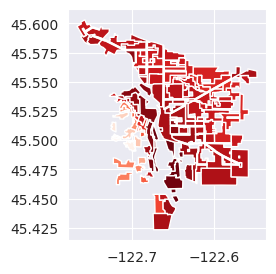

In [ ]:
# Worldclim
loc_polys.plot(column='bio01', cmap='Reds')

<Axes: >

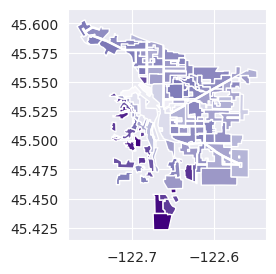

In [ ]:
# Landsat EVI
loc_polys.plot(column='EVI_median', cmap='Purples')

<Axes: >

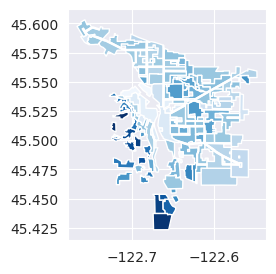

In [ ]:
# Tree Canopy Cover
loc_polys.plot(column='Science_Percent_Tree_Canopy_Cover', cmap='Blues')

<Axes: >

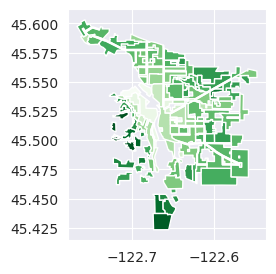

In [ ]:
# MODIS
loc_polys.plot(column='NDVI', cmap='Greens')

## Graph some relationships

Compare the different variables just measured

### Scatterplot with HOLC values

Make a scatterplot showing the different HOLC zones by color, and the relationship between the EVI valueas and the Mean Temperature Values

Text(0.5, 1.0, 'EVI_median and bio01 in HOLC areas')

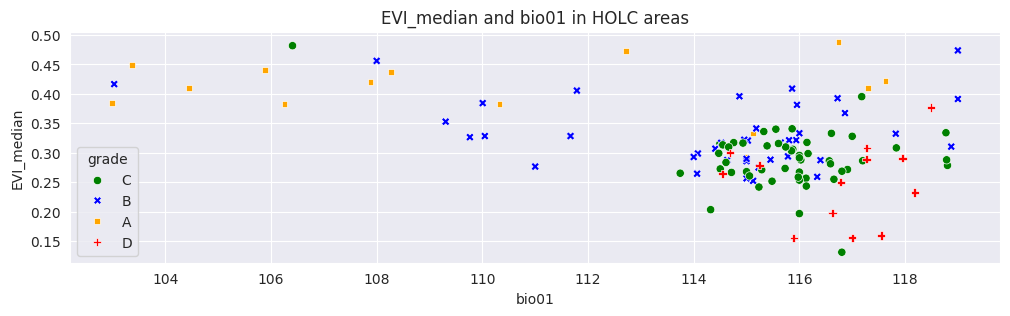

In [ ]:
# @title
# figure size in inches
rcParams['figure.figsize'] = 12,3
sns.set_style("darkgrid")

# what to plot
x = 'bio01'
y = 'EVI_median'
data = loc_polys
hue='grade'
style= 'grade'
palette=['green', 'blue', 'orange', 'red']
#scatterplot
ax = sns.scatterplot(data=data, x=x, y=y, hue=hue, palette=palette, style=style)

ax.set_title(f'{y} and {x} in HOLC areas')

Make a scatterplot showing the different HOLC zones by color, and the relationship between the NDVI value and the tree canopy percentage values.

Text(0.5, 1.0, 'NDVI and Science_Percent_Tree_Canopy_Cover in HOLC areas')

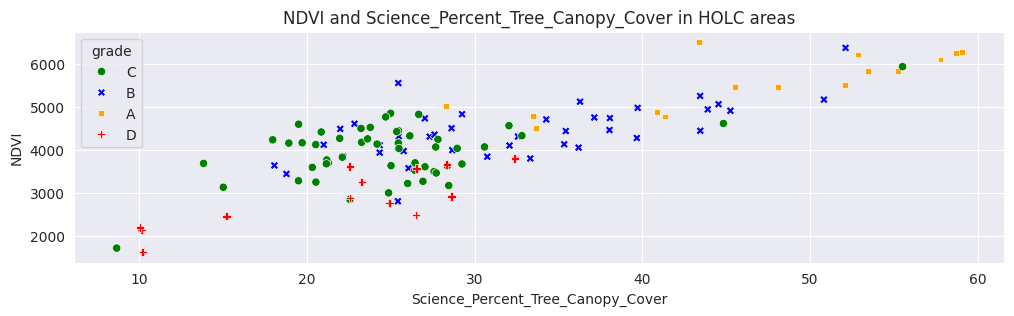

In [ ]:
# @title
# figure size in inches
rcParams['figure.figsize'] = 12,3
sns.set_style("darkgrid")

# what to plot
x = 'Science_Percent_Tree_Canopy_Cover'
y = 'NDVI'
data = loc_polys
hue='grade'
style= 'grade'
palette=['green', 'blue', 'orange', 'red']
#scatterplot
ax = sns.scatterplot(data=data, x=x, y=y, hue=hue, palette=palette, style=style)

ax.set_title(f'{y} and {x} in HOLC areas')

## *Question: Describe the relationships shown in the above scatterplot - what are differences between the HOLC grades in the urban region for the vegetation index (NDVI) and for tree canopy cover (%)?*

# Plot the HOLC zones with the measured earth engine variables on the map

After plotting, an .html file of the plot will be saved in the colaboratory user space. The HOLC polygon data will be preserved, but the Earth Engine dataset connection will not work with the downloaded file unless you have opened your earth engine connection also.

Since we will be making many versions of these plots, a function will be created to automate the process. First, a cell will be created to test the code for the function.

## EVI by HOLC Zone


In [ ]:
# @title
# map EVI and HOLC zones
df = loc_polys
chorodata = 'EVI_median'
analysis_layer = evi_median
fill_color = 'YlGn'
layervisParams = colorizedVis

makeHOLCmap(df, analysis_layer, chorodata, fill_color, layervisParams)

/tmp/ipython-input-161396574.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cent = df.centroid


Saved Portland_OR_HOLCandEVI_median.html


## Annual Mean Temperature by HOLC Zone

In [ ]:
# @title
# set display for the worldclim earth engine data
AMTvisParams = {'min': -230.0,'max': 300.0,'palette': ['blue', 'purple', 'cyan', 'green', 'yellow', 'red']}

In [ ]:
# @title
makeHOLCmap(df=loc_polys, analysis_layer=annualMeanTemperature, chorodata='bio01', fill_color='Reds', layervisParams=AMTvisParams)

/tmp/ipython-input-161396574.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cent = df.centroid


Saved Portland_OR_HOLCandbio01.html


## NDVI by HOLC Zone

In [ ]:
# @title
# map EVI and HOLC zones
df = loc_polys
chorodata = 'NDVI'
analysis_layer = ndvi
fill_color = 'YlGn'
layervisParams = ndvi_vis

makeHOLCmap(df, analysis_layer, chorodata, fill_color, layervisParams)

/tmp/ipython-input-161396574.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cent = df.centroid


Saved Portland_OR_HOLCandNDVI.html


## Tree canopy cover by HOLC Zone

> Add blockquote



In [ ]:
# @title
# set display for the tree canopy cover earth engine data
TCCvisParams = {'min': -230.0,'max': 300.0,'palette': ['blue', 'purple', 'cyan', 'green', 'yellow', 'red']}

In [ ]:
# @title
makeHOLCmap(df=loc_polys, analysis_layer=Science_Percent_Tree_Canopy_Cover, chorodata='Science_Percent_Tree_Canopy_Cover', fill_color='Reds', layervisParams=TCCvisParams)

/tmp/ipython-input-161396574.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cent = df.centroid


Saved Portland_OR_HOLCandScience_Percent_Tree_Canopy_Cover.html


## __*Question: For these two layers (NDVI and Tree Canopy Cover) how well do the averages for the different zones compare with the values of the pixels shown underneath - what patterns in the remote sensing pixel data might not be captured in the HOLC area mean values?*__



## Plot the data by HOLC rating

Use a boxplot - *a method for graphically depicting groups of numerical data* - to show sample distributions for each group

https://en.wikipedia.org/wiki/Box_plot




## EVI

Text(0.5, 0, 'HOLC grade')

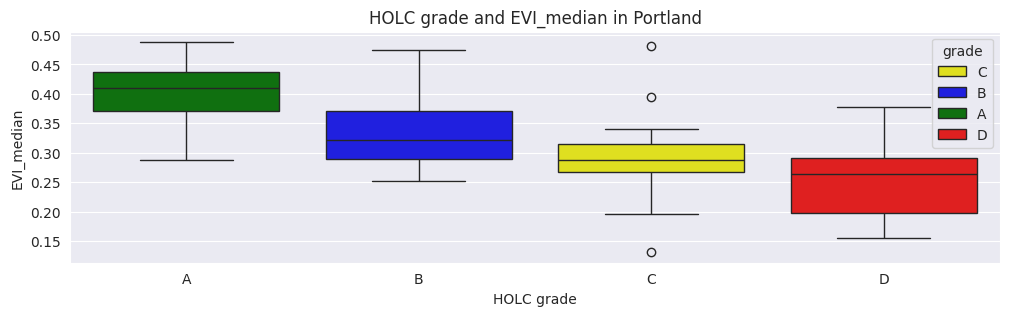

In [ ]:
# @title
var = 'EVI_median'
cdict = {"A": "green", "B": "blue", "C": "yellow", "D": "red"}
ax = sns.boxplot(x='grade', y=var, data=loc_polys, palette=cdict, hue='grade', order=['A', 'B', 'C', 'D'])
ax.set_title(f'HOLC grade and {var} in {cityname}')
ax.set_ylabel(var)
ax.set_xlabel('HOLC grade')

## Annual Mean Temperature
in 1/10 degrees Celcius

<Axes: title={'center': 'HOLC grade and bio01 in Portland'}, xlabel='HOLC grade', ylabel='EVI_median'>

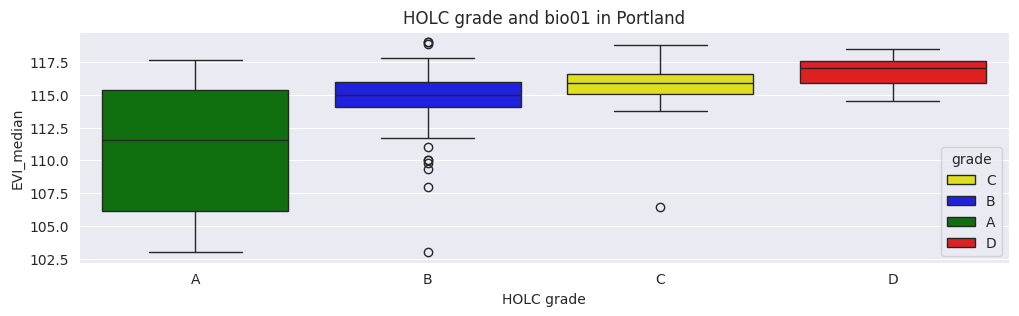

In [ ]:
# @title
plotZoneBoxP(loc_polys, 'bio01')

## NDVI


<Axes: title={'center': 'HOLC grade and NDVI in Portland'}, xlabel='HOLC grade', ylabel='EVI_median'>

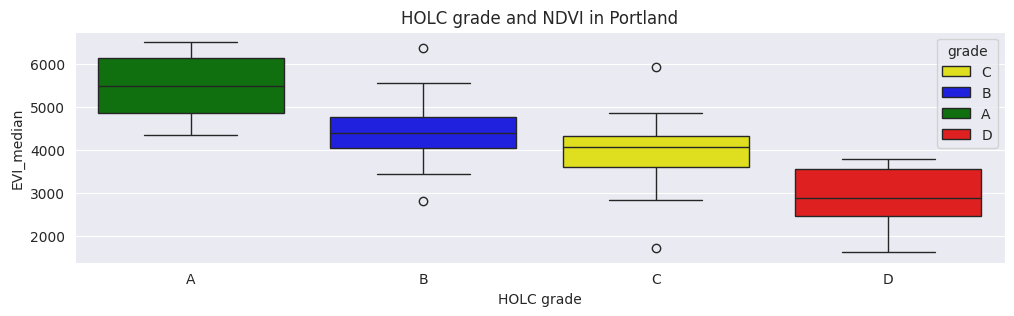

In [ ]:
# @title
plotZoneBoxP(loc_polys, 'NDVI')

## Plot the Tree Canopy Cover

in % annual calculated

<Axes: title={'center': 'HOLC grade and Science_Percent_Tree_Canopy_Cover in Portland'}, xlabel='HOLC grade', ylabel='EVI_median'>

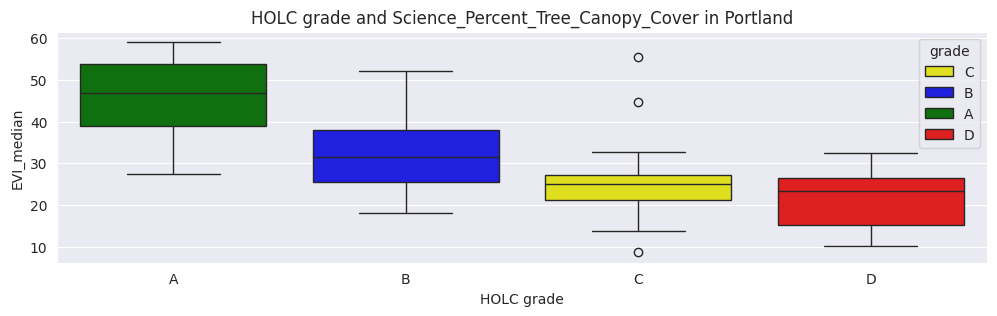

In [ ]:
# @title
plotZoneBoxP(loc_polys, 'Science_Percent_Tree_Canopy_Cover')

## __*Question: Explain the relationships shown in the charts above*__

The boxplots above show the differences in HOLC grade areas by:
-  median EVI from Landsat 8 [https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C01_T1_32DAY_EVI?hl=enList]
- the following variables (bands) from the World Climate database [https://developers.google.com/earth-engine/datasets/catalog/WORLDCLIM_V1_BIO?hl=enList]
 - bio01 - Annual Mean Temperature
 - bio06 - Min temperature of coldest month
 - bio05 - Max temperature of warmest month
 - bio07 - Temperature annual range (bio05-bio06)

Describe the relationships shown between the different grades of the HOLC zones ('A', 'B', 'C', or 'D') and these variables - are they what one might expect based on the idea that lower-graded HOLC zones have less-desirable urban environmental conditions? Are there 'outliers' or certain zones that don't fit with the others in their grade?


## Plot other Bioclimate variables sampled by HOLC zone.

https://developers.google.com/earth-engine/datasets/catalog/WORLDCLIM_V1_BIO

*First, the Min temperature of coldest month (in 1/10 of a degree Celsius)*

<Axes: title={'center': 'HOLC grade and bio06 in Portland'}, xlabel='HOLC grade', ylabel='EVI_median'>

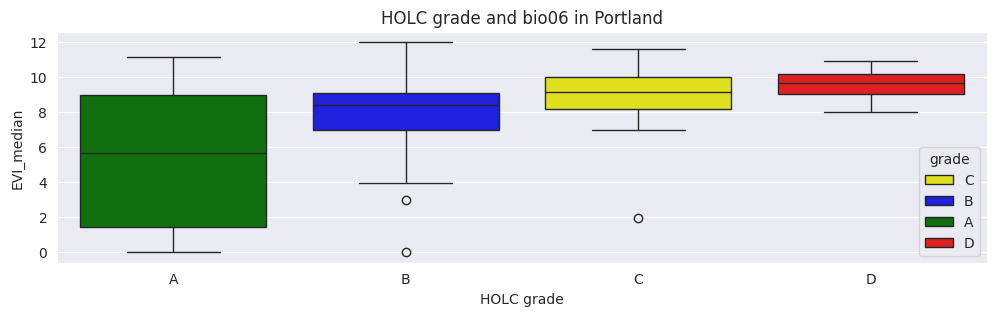

In [ ]:
# @title
plotZoneBoxP(loc_polys, 'bio06')

## Max temperature of the warmest month

<Axes: title={'center': 'HOLC grade and bio05 in Portland'}, xlabel='HOLC grade', ylabel='EVI_median'>

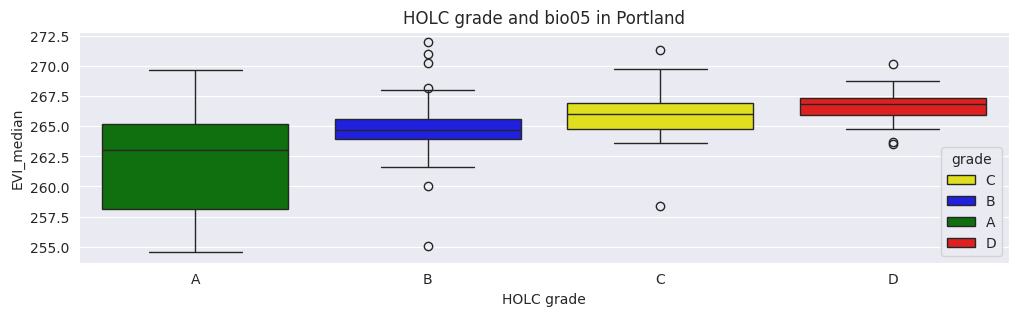

In [ ]:
# @title
plotZoneBoxP(loc_polys, 'bio05')

## Temperature annual range (bio05-bio06)

<Axes: title={'center': 'HOLC grade and bio07 in Portland'}, xlabel='HOLC grade', ylabel='EVI_median'>

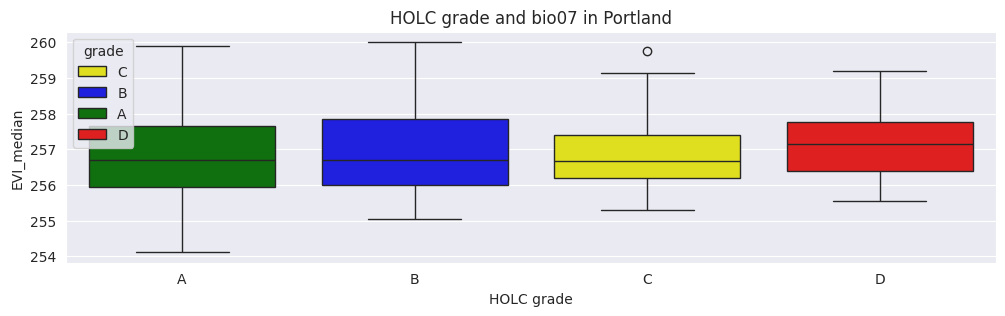

In [ ]:
# @title
plotZoneBoxP(loc_polys, 'bio07')

# Export the sampled data

to get the dataset out of the cloud we can:
 - create a shapefile
 - zip up the shapefile
 - download the zip file from colaboratory

In [ ]:
#name the shapefile and save it in the cloud
shpfile_name = f'{cityname}_{statename}_HOLC_EE_statistics.shp'
loc_polys.to_file(shpfile_name)

/tmp/ipython-input-2184249919.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  loc_polys.to_file(shpfile_name)
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'city_survey' to 'city_surve'
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'residential' to 'residentia'
  ogr_write(
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Science_Percent_Tree_Canopy_Cover' to 'Science_Pe'
  ogr_write(


## Zip up the shapefile



In [ ]:
fname = shpfile_name.split('.')[0]
f_to_zip = glob.glob(f'{fname}*')
f_to_zip

['Portland_OR_HOLC_EE_statistics.dbf',
 'Portland_OR_HOLC_EE_statistics.shp',
 'Portland_OR_HOLC_EE_statistics.shx',
 'Portland_OR_HOLC_EE_statistics.prj',
 'Portland_OR_HOLC_EE_statistics.cpg']

In [ ]:
zip_name = f'Zipped_{fname}.zip'
# zip up the files
# Create a ZipFile Object
with ZipFile(zip_name, 'w') as zipObj:
   # Add multiple files to the zip
   for file in f_to_zip:
     zipObj.write(file)
print(f'Saved {zip_name}')

Saved Zipped_Portland_OR_HOLC_EE_statistics.zip


# __*Download the work*__

Look in the 'files' for the notebook (the tab on the left side) and a zip file should be there. Use the tools there to download this file to your computer and then put in onto your userspace.

You should also print a PDF of the completed notebook to turn in

# Follow up

examining other datasets

## Run for a different urban area with HOLC polygons - name it after your new study area

- requires changing the state and city location for the HOLC study area
- getting the new study area shapefile and ee layer
- gathering statistics for the new study area
- creating charts and graphs and map figures
- exporting dataset as shapefile




## Add additional variables to the analysyis

- for each earth engine dataset, consider:
 - attention to scale (usually given as meters or angular units): https://opendem.info/arc2meters.html
  - large size pixels in the dataset make them less suitable for this analysis
 - attention to temporal period of the data
 - is it a image collection or an image?
 - is it necessary to calculate image math?
- for each dataset:
 - run the sampling function
 - join the data back to the study area polygons




## To do this...



1.   make a copy of this notebook and re-run the whole thing, changing the city name at the beginning.
2.   To add new datasets at the end, pay attention to the details of the new datasets you want to use and look at the accompanying demonstration notebook for *Wheeling, WV*.
3. You can also copy and modify the *Wheeling, WV* notebook if that suits your needs better.




